In [107]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import pandas as pd
# ref = https://fbref.com/en/comps/12/stats/La-Liga-Stats

In [108]:
dataframe=pd.read_csv("../Data/player_stats_updated.csv",sep=',', header=1)
dataframe

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,1,Luis Abram\1f462f95,pe PER,DF,Granada,25-352,1996.0,8,6,560,...,0.5,0.5,0.0,0.5,0.08,0.00,0.08,0.08,0.08,Matches
1,2,Marcos Acuña\81442ecb,ar ARG,DF,Sevilla,30-109,1991.0,21,17,1490,...,1.3,1.3,2.3,3.6,0.08,0.14,0.22,0.08,0.22,Matches
2,3,Martin Agirregabiria\355c883a,es ESP,DF,Alavés,25-280,1996.0,18,16,1457,...,0.1,0.1,0.9,1.0,0.01,0.06,0.06,0.01,0.06,Matches
3,4,Julen Agirrezabala\a2c1a8d3,es ESP,GK,Athletic Club,21-050,2000.0,4,4,360,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Sergio Agüero\4d034881,ar ARG,FW,Barcelona,33-257,1988.0,4,2,151,...,1.1,1.1,0.3,1.3,0.64,0.16,0.80,0.64,0.80,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,582,Joseba Zaldúa\5ca20b7a,es ESP,DF,Real Sociedad,29-235,1992.0,16,9,781,...,0.0,0.0,0.4,0.4,0.00,0.04,0.05,0.00,0.05,Matches
582,583,Oier Zarraga\968a1c2f,es ESP,MF,Athletic Club,23-041,1999.0,18,6,767,...,0.4,0.4,0.2,0.6,0.05,0.02,0.07,0.05,0.07,Matches
583,584,Luca Zidane\c818c4d9,fr FRA,GKMF,Rayo Vallecano,23-277,1998.0,4,4,285,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
584,585,Igor Zubeldia\5c7845f6,es ESP,DFMF,Real Sociedad,24-321,1997.0,14,9,781,...,0.6,0.6,0.0,0.6,0.07,0.00,0.07,0.07,0.07,Matches


In [109]:
#cleaning the data
for i, row in dataframe.iterrows():
    dataframe.at[i,'Age']=str(dataframe.at[i,'Age'])
    ifor_val=dataframe.at[i,'Age'].split("-",1)
    dataframe.at[i,'Age']=ifor_val[0]
    dataframe.at[i,'Age']=float(dataframe.at[i,'Age'])
for i, row in dataframe.iterrows():
    ifor_val=dataframe.at[i,'Player'].split("\\",1)
    dataframe.at[i,'Player']=ifor_val[0]

In [110]:
selectedData = dataframe.filter(['Player','Age','90s', 'xG','xA'], axis=1)
selectedData

,Player,Age,90s,xG,xA
0,Luis Abram,25.0,6.2,0.5,0.0
1,Marcos Acuña,30.0,16.6,1.3,2.3
2,Martin Agirregabiria,25.0,16.2,0.1,0.9
3,Julen Agirrezabala,21.0,4.0,0.0,0.0
4,Sergio Agüero,33.0,1.7,1.1,0.3
...,...,...,...,...,...
581,Joseba Zaldúa,29.0,8.7,0.0,0.4
582,Oier Zarraga,23.0,8.5,0.4,0.2
583,Luca Zidane,23.0,3.2,0.0,0.0
584,Igor Zubeldia,24.0,8.7,0.6,0.0


In [111]:
selectedData = selectedData[selectedData['xA'] > 1]
selectedData = selectedData[selectedData['xG'] > 1]
selectedData = selectedData[selectedData['Age']< 26]
selectedData

,Player,Age,90s,xG,xA
18,Carles Aleñá,24.0,19.3,1.3,1.2
72,Lucas Boyé,25.0,15.1,4.4,1.7
109,Samuel Chukwueze,22.0,6.5,1.5,1.1
117,Santi Comesaña,25.0,19.2,2.8,1.6
131,Matheus Cunha,22.0,6.5,3.7,1.5
138,Sergiño Dest,21.0,13.0,1.5,2.7
139,Boulaye Dia,25.0,10.0,4.4,1.3
160,Youssef En-Nesyri,24.0,6.6,3.4,1.2
174,João Félix,22.0,7.7,1.9,1.5
184,Jorge de Frutos,24.0,15.7,4.5,2.2


['Carles', 'Aleñá']
['Lucas', 'Boyé']
['Samuel', 'Chukwueze']
['Santi', 'Comesaña']
['Matheus', 'Cunha']
['Sergiño', 'Dest']
['Boulaye', 'Dia']
['Youssef', 'En-Nesyri']
['João', 'Félix']
['Jorge', 'de Frutos']
['Maxi', 'Gómez']
['Nicolás', 'González']
['Gonçalo', 'Guedes']
['Alexander', 'Isak']
['Luis', 'Javier Suárez']
['Frenkie', 'de Jong']
['Vinicius', 'Júnior']
['Takefusa', 'Kubo']
['Maranhão']
['Brais', 'Méndez']
['Mikel', 'Merino']
['Jon', 'Moncayola']
['Tete', 'Morente']
['Toni', 'Moya']
['Randy', 'Ntekja']
['Mathías', 'Olivera']
['Mikel', 'Oyarzabal']
['Gavi', 'Paez']
['Pedrosa']
['Yeremi', 'Pino']
['Rodrigo']
['Oihan', 'Sancet']
['Carlos', 'Soler']
['Nico', 'Williams']
Williams


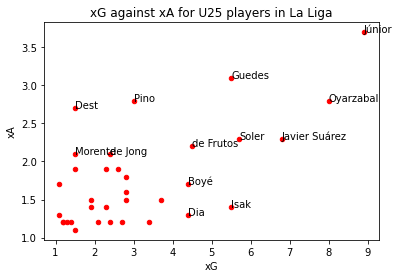

In [112]:
selectedData.plot(kind='scatter',x='xG',y='xA',color='red')
plt.title('xG against xA for U25 players in La Liga')



for a, row in selectedData.iterrows():
    afor_val=selectedData.at[a,'Player'].split(" ",1)
    try:
        selectedData.at[a,'Player']=afor_val[1]
    except:
        selectedData.at[a,'Player']=afor_val[0]
    print(afor_val)
    

print(afor_val[1])
    
for index, row in selectedData.iterrows():
    if row['xG']>4 or row['xA']>1.9:
        plt.text(row['xG'],row['xA'],row['Player'])
plt.show()

   
